## TDS3301 DATA MINING: Association Rule Mining 

#### Name: Muhammad Waiee bin Zainol
#### Student ID: 1191103225
#### Lecture/Tutorial: TC1L/TT1L

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
import mlxtend.frequent_patterns as fp

sns.set()
%matplotlib inline

In [2]:
#read csv file
df = pd.read_csv('DATA (1).csv')
display(df)

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


## Data Exploration

### Statistics Summary

In [3]:
#statistics summary
print(df.describe())

                1           2           3           4           5           6  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     1.620690    1.600000    1.944828    3.572414    1.662069    1.600000   
std      0.613154    0.491596    0.537216    0.805750    0.474644    0.491596   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    2.000000    3.000000    1.000000    1.000000   
50%      2.000000    2.000000    2.000000    3.000000    2.000000    2.000000   
75%      2.000000    2.000000    2.000000    4.000000    2.000000    2.000000   
max      3.000000    2.000000    3.000000    5.000000    2.000000    2.000000   

                7           8           9          10  ...          23  \
count  145.000000  145.000000  145.000000  145.000000  ...  145.000000   
mean     1.579310    1.627586    1.620690    1.731034  ...    1.337931   
std      0.495381    1.020245    1.061112    0.7

### Check data types

In [4]:
#check data types
df.dtypes

STUDENT ID    object
1              int64
2              int64
3              int64
4              int64
5              int64
6              int64
7              int64
8              int64
9              int64
10             int64
11             int64
12             int64
13             int64
14             int64
15             int64
16             int64
17             int64
18             int64
19             int64
20             int64
21             int64
22             int64
23             int64
24             int64
25             int64
26             int64
27             int64
28             int64
29             int64
30             int64
COURSE ID      int64
GRADE          int64
dtype: object

### Check null values

In [5]:
total_null_values = df.isnull().sum().sum()
print("Total Null Values:", total_null_values)

Total Null Values: 0


### Check distribution

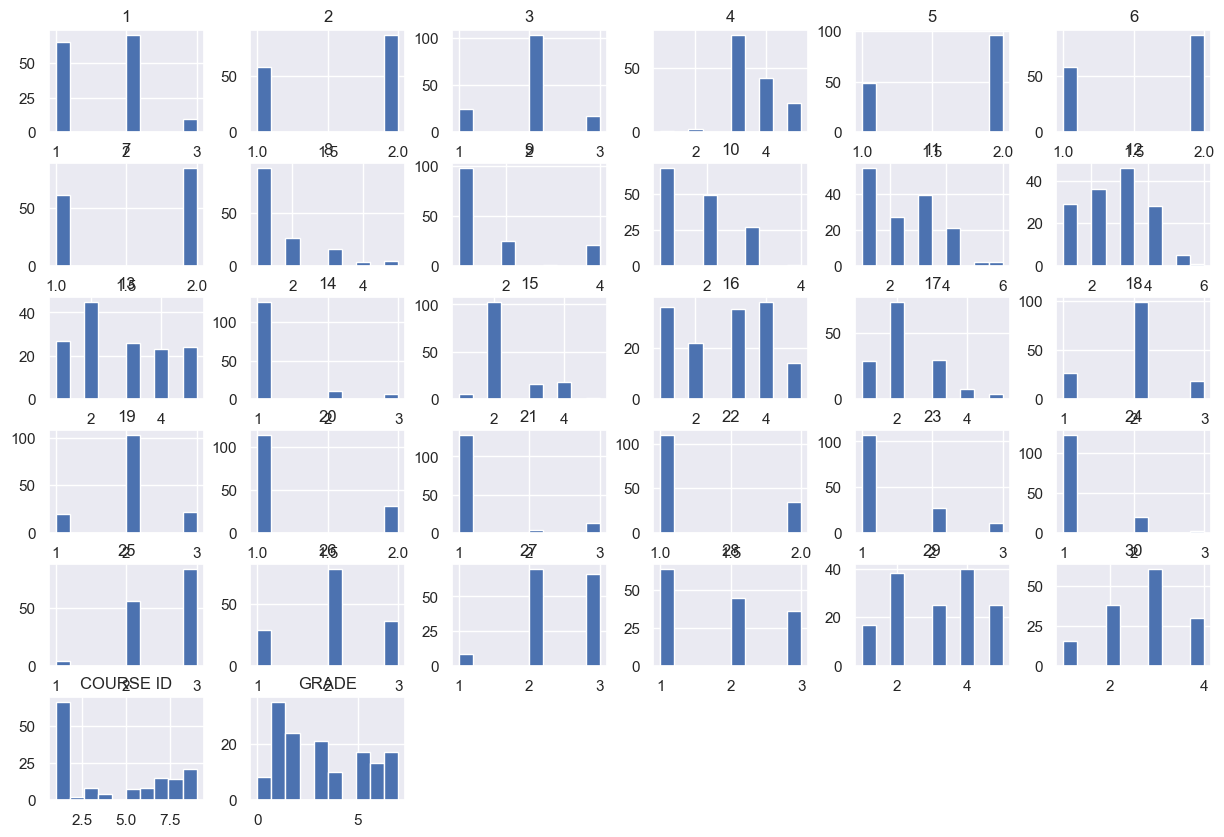

In [6]:
df.hist(figsize=(15, 10))
plt.show()

### Heatmap

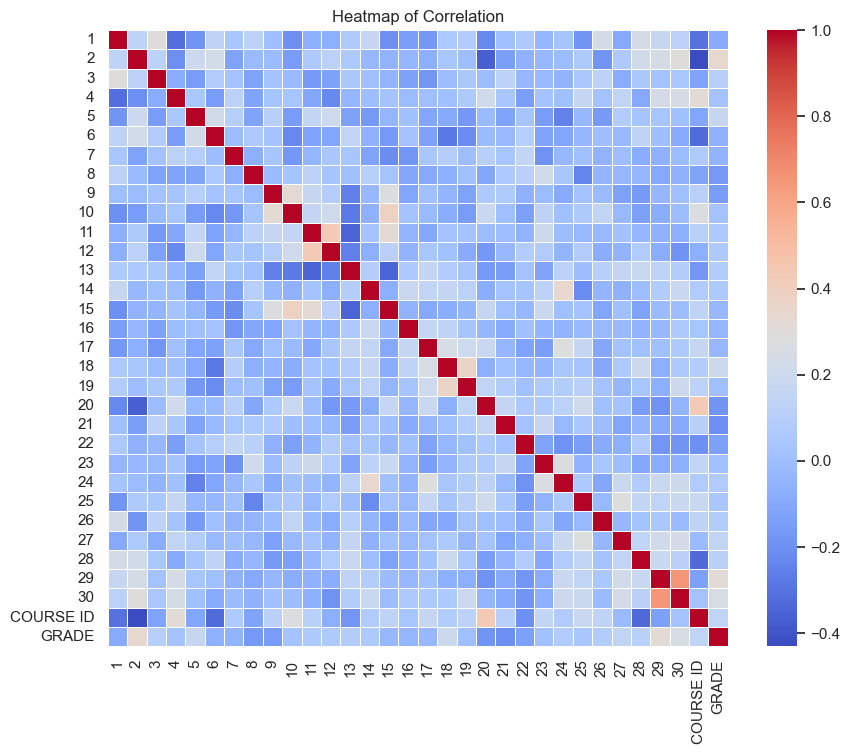

In [7]:
# Create a heatmap
numeric_columns = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
sns.heatmap(numeric_columns.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation')
plt.show()

### Variables Exploration

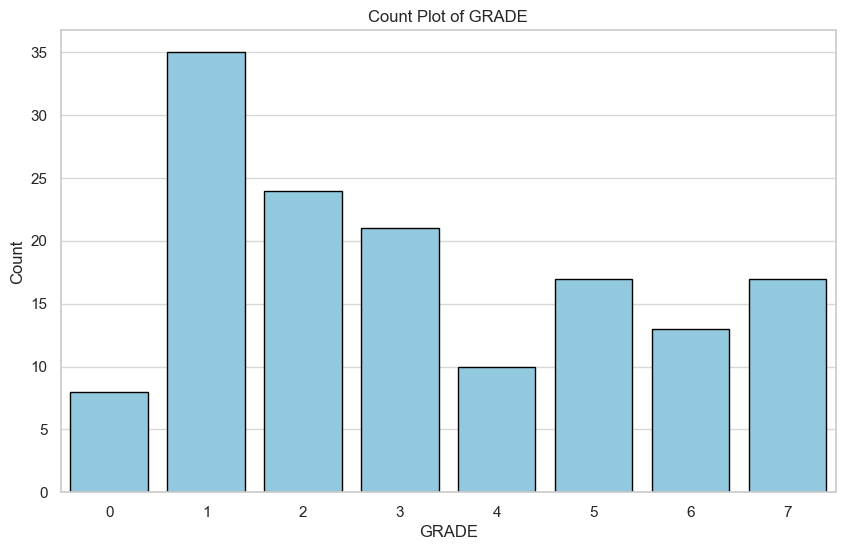

In [8]:
# Countplot  of GRADE
column_to_plot = 'GRADE'
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(10, 6))  
sns.countplot(x=df[column_to_plot], color='skyblue', edgecolor='black') 
plt.title(f'Count Plot of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()


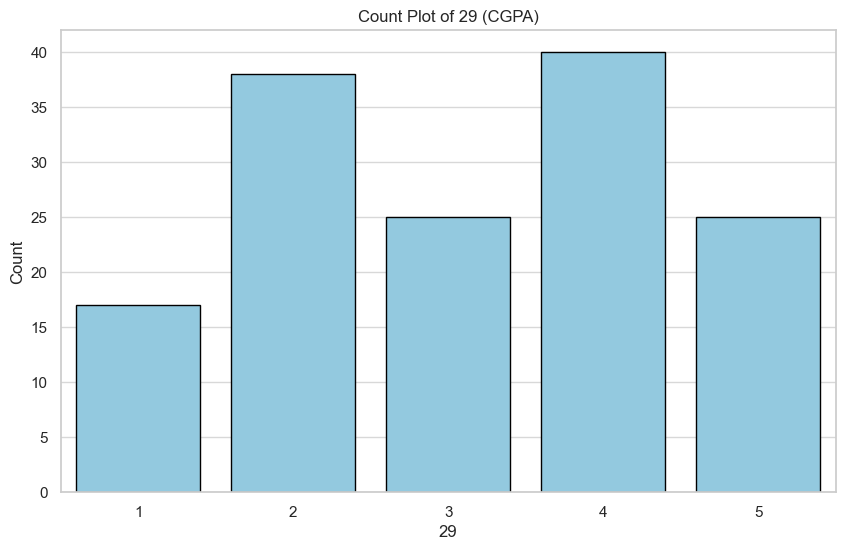

In [9]:
# Countplot of CGPA

column_to_plot = '29'
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6)) 
sns.countplot(x=df[column_to_plot], color='skyblue', edgecolor='black')
plt.title(f'Count Plot of {column_to_plot} (CGPA)')
plt.xlabel(column_to_plot)
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()


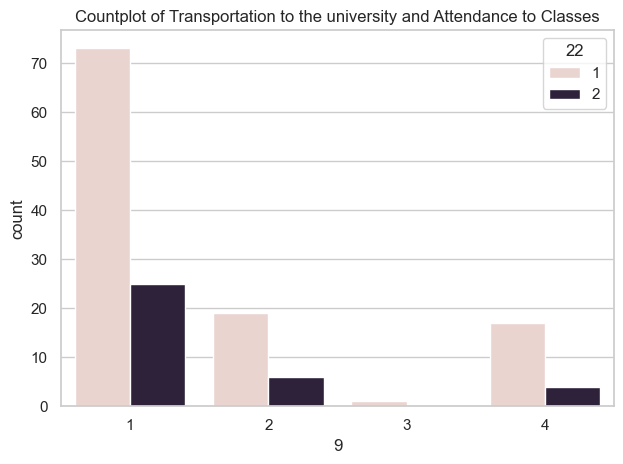

In [10]:
#Transportation and Attendance to classes
col1 = ['9','22']
df1 = pd.DataFrame(col1)

sns.set(style="whitegrid")
sns.countplot(x=df['9'],hue=df['22'], data=df)
plt.title('Countplot of Transportation to the university and Attendance to Classes')

plt.tight_layout()
plt.show()

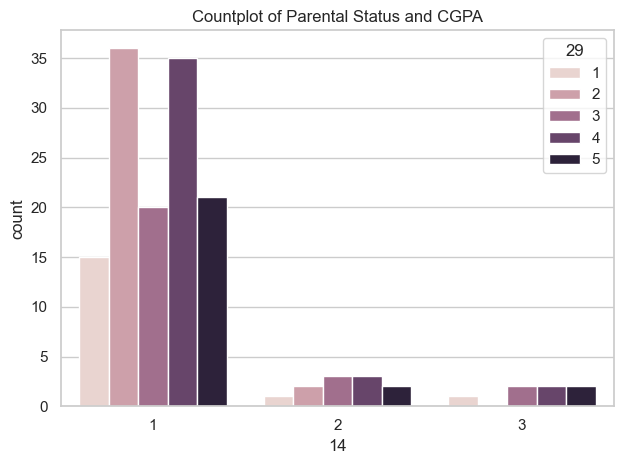

In [11]:
#Parental Status and CGPA
col1 = ['14','29']
df1 = pd.DataFrame(col1)

sns.set(style="whitegrid") 
sns.countplot(x=df['14'],hue=df['29'], data=df)
plt.title('Countplot of Parental Status and CGPA')

plt.tight_layout()
plt.show()

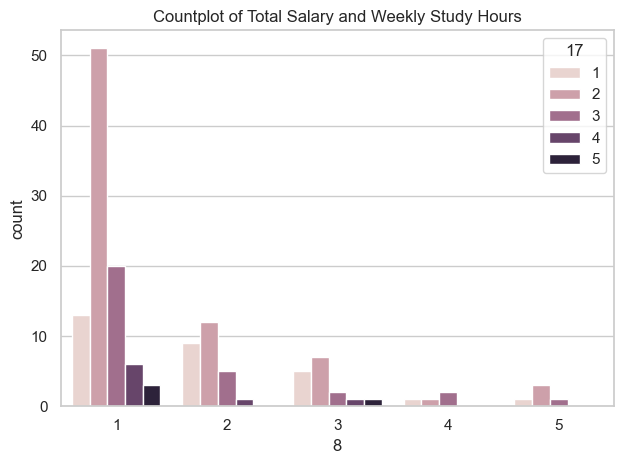

In [12]:
#Total Salary and Weekly Study Hours
col1 = ['8','17']
df1 = pd.DataFrame(col1)

sns.set(style="whitegrid")
sns.countplot(x=df['8'],hue=df['17'], data=df1)
plt.title('Countplot of Total Salary and Weekly Study Hours')

plt.tight_layout()
plt.show()

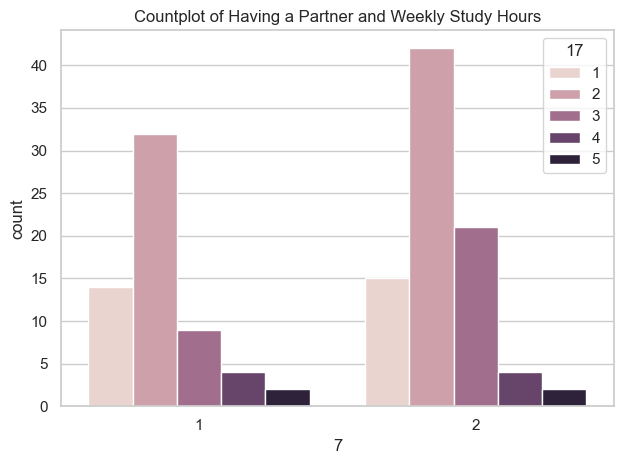

In [13]:
#Partner and Weekly Study Hours
col1 = ['7','17']
df1 = pd.DataFrame(col1)

sns.set(style="whitegrid")
sns.countplot(x=df['7'],hue=df['17'], data=df1)
plt.title('Countplot of Having a Partner and Weekly Study Hours')

plt.tight_layout()
plt.show()

## Data Preprocessing

### Check null value

In [14]:
#check null value
print(df.isnull().sum())

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64


### Transformation

In [15]:
display(df)

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [16]:
#change column name
colname_mapping = {
    '1': 'Student_Age','2': 'Sex','3': 'Grad_High_Sch_Type',
    '4': 'Scholar_Type','5': 'Additional_work',
    '6': 'Reg_Or_Sport','7': 'Partner',
    '8': 'Total_Salary','9': 'Transport',
    '10': 'Accommodation_Type','11': 'Mother_Edu',
    '12': 'Father_Edu','13': 'Siblings',
    '14': 'Parental_Status','15': 'Mother_Occupation',
    '16': 'Father_Occupation', '17': 'Weekly_Study',
    '18': 'RF_NonScientific', '19': 'RF_Scientific',
    '20': 'Attend_Seminar', '21': 'Impact_Project',
    '22': 'Attend_Class', '23': 'Pre_Midterm_Companion',
    '24': 'Pre_Midterm_Timeline', '25': 'Take_Note',
    '26': 'Listen_Class', '27': 'Discussion',
    '28': 'Flip_Class', '29': 'CGPA',
    '30': 'Expect_CGPA'
}

new_df = df.copy()
new_df.rename(columns=colname_mapping, inplace=True)
display(new_df)

,STUDENT ID,Student_Age,Sex,Grad_High_Sch_Type,Scholar_Type,Additional_work,Reg_Or_Sport,Partner,Total_Salary,Transport,...,Pre_Midterm_Companion,Pre_Midterm_Timeline,Take_Note,Listen_Class,Discussion,Flip_Class,CGPA,Expect_CGPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [17]:
final_df = new_df.copy()

final_df['Student_Age'] = final_df['Student_Age'].map({1: '18-21', 2: '22-25', 3: 'above 26'})
final_df['Sex'] = final_df['Sex'].map({1: 'female', 2: 'male'})
final_df['Grad_High_Sch_Type'] = final_df['Grad_High_Sch_Type'].map({1: 'private', 2: 'state', 3: 'other'})
final_df['Scholar_Type'] = final_df['Scholar_Type'].map({1: 'None', 2: '25%', 3: '50%',4: '75%',5: 'Full'})
final_df['Additional_work'] = final_df['Additional_work'].map({1: 'Yes', 2: 'No'})
final_df['Reg_Or_Sport'] = final_df['Reg_Or_Sport'].map({1: 'Yes', 2: 'No'})
final_df['Partner'] = final_df['Partner'].map({1: 'Yes', 2: 'No'})
#final_df['Total_Salary'] = final_df['Total_Salary'].map({1: 'USD 135-200', 2: 'USD 201-270', 3: 'USD 271-340', 4: 'USD 341-410',5: 'above 410'})
final_df['Accommodation_Type'] = final_df['Accommodation_Type'].map({1: 'rental', 2: 'dormitory', 3: 'with family', 4: 'Other'})
final_df['Mother_Edu'] = final_df['Mother_Edu'].map({1: 'primary school', 2: 'secondary school', 3: 'high school', 4:'university', 5:'MSc.',6:'Ph.D.'})
final_df['Father_Edu'] = final_df['Father_Edu'].map({1: 'primary school', 2: 'secondary school', 3: 'high school', 4:'university', 5:'MSc.',6:'Ph.D.'})
final_df['Siblings'] = final_df['Siblings'].map({1: '1', 2: '2', 3:'3',4:'4',5:'5 or above'})
final_df['Parental_Status'] = final_df['Parental_Status'].map({1: 'married', 2: 'divorced',3:'died - one of them or both'})
final_df['Mother_Occupation'] = final_df['Mother_Occupation'].map({1: 'retired', 2: 'housewife',3:'government officer',4:'private sector employee',5:'self-employment',6:'other'})
final_df['Father_Occupation'] = final_df['Father_Occupation'].map({1: 'retired', 2: 'housewife',3:'government officer',4:'private sector employee',5:'self-employment',6:'other'})
# final_df['Weekly_Study'] = final_df['Weekly_Study'].map({1: 'None', 2: '<5 hours',3:'6-10 hours',4:'11-20 hours',5:'more than 20 hours'})
final_df['RF_NonScientific'] = final_df['RF_NonScientific'].map({1: 'None', 2: 'Sometimes', 3:'Often'})
final_df['RF_Scientific'] = final_df['RF_Scientific'].map({1: 'None', 2: 'Sometimes', 3:'Often'})
final_df['Attend_Seminar'] = final_df['Attend_Seminar'].map({1: 'Yes', 2: 'No'})
final_df['Impact_Project'] = final_df['Impact_Project'].map({1: 'positive', 2: 'negative',3:'netural'})
final_df['Attend_Class'] = final_df['Attend_Class'].map({1: 'always', 2: 'sometimes',3:'never'})
final_df['Pre_Midterm_Companion'] = final_df['Pre_Midterm_Companion'].map({1: 'alone', 2: 'with friends',3:'not applicable'})
final_df['Pre_Midterm_Timeline'] = final_df['Pre_Midterm_Timeline'].map({1: 'closest date to exam', 2: 'regularly during the semester',3:'never'})
final_df['Take_Note'] = final_df['Take_Note'].map({1: 'never', 2: 'sometimes',3:'always'})
final_df['Listen_Class'] = final_df['Listen_Class'].map({1: 'never', 2: 'sometimes',3:'always'})
final_df['Discussion'] = final_df['Discussion'].map({1: 'never', 2: 'sometimes',3:'always'})
final_df['Flip_Class'] = final_df['Flip_Class'].map({1: 'not useful', 2: 'useful',3:'not applicable'})
#final_df['CGPA'] = final_df['CGPA'].map({1: '< 2.00', 2: '2.00-2.49',3:'2.50-2.99',4:'3.00-3.49',5:'above 3.49'})
final_df['Expect_CGPA'] = final_df['Expect_CGPA'].map({1: '< 2.00', 2: '2.00-2.49',3:'2.50-2.99',4:'3.00-3.49',5:'above 3.49'})
final_df['GRADE'] = final_df['GRADE'].map({0:'Fail',1: 'DD', 2: 'DC',3:'CC',4:'CB',5:'BB',6:'BA',7:'AA'})

display(final_df)

,STUDENT ID,Student_Age,Sex,Grad_High_Sch_Type,Scholar_Type,Additional_work,Reg_Or_Sport,Partner,Total_Salary,Transport,...,Pre_Midterm_Companion,Pre_Midterm_Timeline,Take_Note,Listen_Class,Discussion,Flip_Class,CGPA,Expect_CGPA,COURSE ID,GRADE
0,STUDENT1,22-25,male,other,50%,Yes,No,No,1,1,...,alone,closest date to exam,always,sometimes,never,useful,1,< 2.00,1,DD
1,STUDENT2,22-25,male,other,50%,Yes,No,No,1,1,...,alone,closest date to exam,always,sometimes,always,useful,2,2.50-2.99,1,DD
2,STUDENT3,22-25,male,state,50%,No,No,No,2,4,...,alone,closest date to exam,sometimes,sometimes,never,not useful,2,2.00-2.49,1,DD
3,STUDENT4,18-21,female,private,50%,Yes,No,Yes,2,1,...,alone,regularly during the semester,always,sometimes,sometimes,not useful,3,2.00-2.49,1,DD
4,STUDENT5,22-25,male,private,50%,No,No,Yes,3,1,...,with friends,closest date to exam,sometimes,sometimes,sometimes,not useful,2,2.00-2.49,1,DD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,22-25,female,state,50%,Yes,Yes,No,1,1,...,alone,closest date to exam,sometimes,never,sometimes,not useful,3,2.50-2.99,9,BB
141,STUDENT142,18-21,female,state,75%,No,No,No,1,4,...,alone,closest date to exam,always,sometimes,sometimes,not useful,5,2.50-2.99,9,BB
142,STUDENT143,18-21,female,private,75%,No,No,No,1,1,...,alone,closest date to exam,always,always,sometimes,not useful,4,2.50-2.99,9,DD
143,STUDENT144,22-25,female,state,75%,Yes,Yes,Yes,5,2,...,with friends,closest date to exam,sometimes,never,sometimes,not useful,5,2.50-2.99,9,CB


## Discretization

In [18]:
#CGPA: If <=2.99 then 0, else 1.
final_df['CGPA'] = final_df['CGPA'].map(lambda x: 0 if x <= 3 else 1)

#Total Salary: If <USD340, then 0, else 1.
final_df['Total_Salary'] = final_df['Total_Salary'].map(lambda x: 0 if x <= 3 else 1)

#Weekly Study Hours: If None(0) or <5 hours(1), then 0. else is 1.
final_df['Weekly_Study'] = final_df['Weekly_Study'].map(lambda x: 0 if x <= 2 else 1)

exp = final_df[['CGPA', 'Total_Salary', 'Weekly_Study']].copy()
display(exp)


,CGPA,Total_Salary,Weekly_Study
0,0,0,1
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
140,0,0,1
141,1,0,1
142,1,0,0
143,1,1,0


In [19]:
col_disc = ['CGPA','Total_Salary','Weekly_Study']
for column in col_disc:
    final_df[column] = final_df[column].map({0: 'Low', 1: 'High'})

exp = final_df[['CGPA', 'Total_Salary', 'Weekly_Study']].copy()
display(exp)
# display(final_df)

,CGPA,Total_Salary,Weekly_Study
0,Low,Low,High
1,Low,Low,Low
2,Low,Low,Low
3,Low,Low,High
4,Low,Low,Low
...,...,...,...
140,Low,Low,High
141,High,Low,High
142,High,Low,Low
143,High,High,Low


## Association Rule Mining

### 1. Transport --> Attend Classes

In [20]:
#Transport --> Attend_Class
col = ['Transport','Attend_Class']
newfinal_df = final_df[col].copy()
newfinaldf_encode = pd.get_dummies(newfinal_df, columns=col)
display(newfinaldf_encode)

,Transport_1,Transport_2,Transport_3,Transport_4,Attend_Class_always,Attend_Class_sometimes
0,True,False,False,False,True,False
1,True,False,False,False,True,False
2,False,False,False,True,True,False
3,True,False,False,False,True,False
4,True,False,False,False,True,False
...,...,...,...,...,...,...
140,True,False,False,False,True,False
141,False,False,False,True,False,True
142,True,False,False,False,True,False
143,False,True,False,False,True,False


In [21]:
#fpapriori method
fp_apriori = fp.apriori(newfinaldf_encode,min_support=0.3,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.675862,(Transport_1)
1,0.758621,(Attend_Class_always)
2,0.503448,"(Transport_1, Attend_Class_always)"


In [22]:
assoc_rules = fp.association_rules(fp_apriori,metric='lift', min_threshold=0.9,support_only=False)
display(assoc_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Transport_1),(Attend_Class_always),0.675862,0.758621,0.503448,0.744898,0.981911,-0.009275,0.946207,-0.053778
1,(Attend_Class_always),(Transport_1),0.758621,0.675862,0.503448,0.663636,0.981911,-0.009275,0.963653,-0.070909


### 2. Parental_Status --> CGPA

In [23]:
#Parental_Status --> CGPA
col = ['Parental_Status','CGPA']
newfinal_df = final_df[col].copy()
newfinaldf_encode = pd.get_dummies(newfinal_df, columns=col)
display(newfinaldf_encode)

,Parental_Status_died - one of them or both,Parental_Status_divorced,Parental_Status_married,CGPA_High,CGPA_Low
0,False,False,True,False,True
1,False,False,True,False,True
2,False,False,True,False,True
3,False,False,True,False,True
4,False,False,True,False,True
...,...,...,...,...,...
140,False,True,False,False,True
141,False,False,True,True,False
142,False,False,True,True,False
143,False,False,True,True,False


In [24]:
#fpapriori method
fp_apriori = fp.apriori(newfinaldf_encode,min_support=0.3,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.875862,(Parental_Status_married)
1,0.448276,(CGPA_High)
2,0.551724,(CGPA_Low)
3,0.386207,"(CGPA_High, Parental_Status_married)"
4,0.489655,"(Parental_Status_married, CGPA_Low)"


In [25]:
assoc_rules = fp.association_rules(fp_apriori,metric='lift', min_threshold=1.0,support_only=False)
display(assoc_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Parental_Status_married),(CGPA_Low),0.875862,0.551724,0.489655,0.559055,1.013287,0.006421,1.016626,0.105634
1,(CGPA_Low),(Parental_Status_married),0.551724,0.875862,0.489655,0.887500,1.013287,0.006421,1.103448,0.029252


### 3. Total Salary --> Weekly Study Hours

In [26]:
#Total_Salary --> Weekly Study Hours
col = ['Total_Salary','Weekly_Study']
newfinal_df = final_df[col].copy()
newfinaldf_encode = pd.get_dummies(newfinal_df, columns=col)
display(newfinaldf_encode)

,Total_Salary_High,Total_Salary_Low,Weekly_Study_High,Weekly_Study_Low
0,False,True,True,False
1,False,True,False,True
2,False,True,False,True
3,False,True,True,False
4,False,True,False,True
...,...,...,...,...
140,False,True,True,False
141,False,True,True,False
142,False,True,False,True
143,True,False,False,True


In [27]:
#fpapriori method
fp_apriori = fp.apriori(newfinaldf_encode,min_support=0.3,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.937931,(Total_Salary_Low)
1,0.710345,(Weekly_Study_Low)
2,0.668966,"(Weekly_Study_Low, Total_Salary_Low)"


In [28]:
assoc_rules = fp.association_rules(fp_apriori,metric='lift', min_threshold=1.0,support_only=False)
display(assoc_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Weekly_Study_Low),(Total_Salary_Low),0.710345,0.937931,0.668966,0.941748,1.004069,0.002711,1.065517,0.013991
1,(Total_Salary_Low),(Weekly_Study_Low),0.937931,0.710345,0.668966,0.713235,1.004069,0.002711,1.010080,0.065292


### 4. Partner --> Weekly Study Hours

In [29]:
#Total_Salary --> Weekly Study Hours
col = ['Partner','Weekly_Study']
newfinal_df = final_df[col].copy()
newfinaldf_encode = pd.get_dummies(newfinal_df, columns=col)
display(newfinaldf_encode)

,Partner_No,Partner_Yes,Weekly_Study_High,Weekly_Study_Low
0,True,False,True,False
1,True,False,False,True
2,True,False,False,True
3,False,True,True,False
4,False,True,False,True
...,...,...,...,...
140,True,False,True,False
141,True,False,True,False
142,True,False,False,True
143,False,True,False,True


In [30]:
#fpapriori method
fp_apriori = fp.apriori(newfinaldf_encode,min_support=0.3,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.579310,(Partner_No)
1,0.420690,(Partner_Yes)
2,0.710345,(Weekly_Study_Low)
3,0.393103,"(Partner_No, Weekly_Study_Low)"
4,0.317241,"(Weekly_Study_Low, Partner_Yes)"


In [31]:
assoc_rules = fp.association_rules(fp_apriori,metric='lift', min_threshold=1.0,support_only=False)
display(assoc_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Weekly_Study_Low),(Partner_Yes),0.710345,0.420690,0.317241,0.446602,1.061595,0.018407,1.046824,0.200311
1,(Partner_Yes),(Weekly_Study_Low),0.420690,0.710345,0.317241,0.754098,1.061595,0.018407,1.177931,0.100155
